In [ ]:
pip install python-ternary

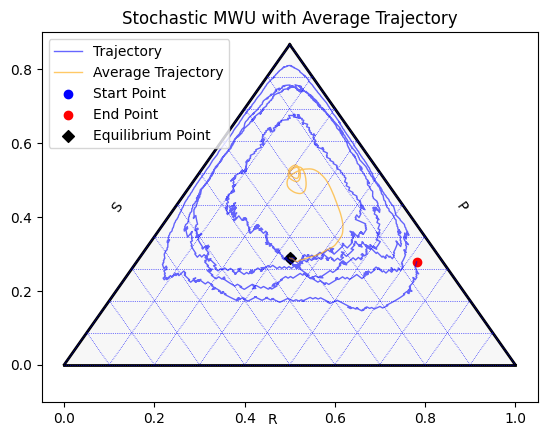

In [ ]:
import numpy as np
import ternary

# Utility matrix for biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def stochastic_mwu(num_steps, eta=0.1):
    n_actions = RPS.shape[0]
    strategies = []
    avg_strategies = []
    cumulative_strategy = np.zeros(n_actions)
    weights = np.ones(n_actions) / n_actions

    for t in range(1, num_steps + 1):
        # Normalize weights to get strategy distribution
        strategy = weights / np.sum(weights)
        strategies.append(strategy.copy())

        # Update cumulative strategy and compute average
        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t
        avg_strategies.append(avg_strategy.copy())

        # Sample an action based on the strategy
        action = np.random.choice(n_actions, p=strategy)
        utility = RPS[:, action]

        # Update weights with multiplicative factor based on observed utility
        weights *= np.exp(eta * utility)

    return np.array(strategies), np.array(avg_strategies)

# Plot ternary plot
def plot_ternary(strategies, avg_strategies, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)
    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)
    tax.set_title(title)
    tax.left_axis_label("S", offset=0.14)
    tax.right_axis_label("P", offset=0.14)
    tax.bottom_axis_label("R", offset=0.14)
    tax.plot(strategies, linewidth=1.0, color="blue", alpha=0.6, label="Trajectory")
    tax.plot(avg_strategies, linewidth=1.0, color="orange", alpha=0.6, label="Average Trajectory")
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")
    tax.scatter([[1/3, 1/3, 1/3]], marker='D', color="black", label="Equilibrium Point")
    tax.legend()
    tax.show()

# Number of steps
num_steps = 4000

# Run and plot stochastic MWU with averaging
stochastic_mwu_strategies, avg_strategies = stochastic_mwu(num_steps, eta=0.1)
plot_ternary(stochastic_mwu_strategies, avg_strategies, "Stochastic MWU with Average Trajectory")

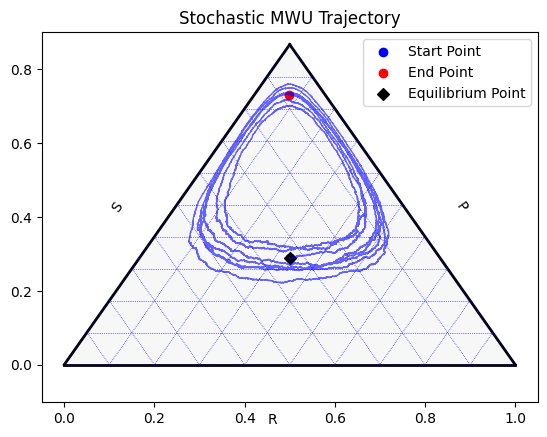

In [ ]:
import numpy as np
import ternary

# Utility matrix for biased RPS
RPS = np.array([
    [0, -1, 3],
    [1, 0, -1],
    [-3, 1, 0]
])

def stochastic_mwu(num_steps, eta):
    n_actions = RPS.shape[0]
    strategies = []
    weights = np.ones(n_actions) / n_actions

    for _ in range(num_steps):
        # Normalize weights to get strategy distribution
        strategy = weights / np.sum(weights)
        strategies.append(strategy.copy())

        # Sample an action based on the strategy
        action = np.random.choice(n_actions, p=strategy)
        utility = RPS[:, action]

        # Update weights with multiplicative factor based on observed utility
        weights *= np.exp(eta * utility)

    return np.array(strategies)

# Plot ternary plot
def plot_ternary(strategies, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)
    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)
    tax.set_title(title)
    tax.left_axis_label("S", offset=0.14)
    tax.right_axis_label("P", offset=0.14)
    tax.bottom_axis_label("R", offset=0.14)
    tax.plot(strategies, linewidth=1.0, color="blue", alpha=0.6)
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")
    tax.scatter([[1/3, 1/3, 1/3]], marker='D', color="black", label="Equilibrium Point")
    tax.legend()
    tax.show()

# Number of steps
num_steps = 70000

# Run and plot stochastic MWU
stochastic_mwu_strategies = stochastic_mwu(num_steps, eta=0.001)
plot_ternary(stochastic_mwu_strategies, "Stochastic MWU Trajectory")

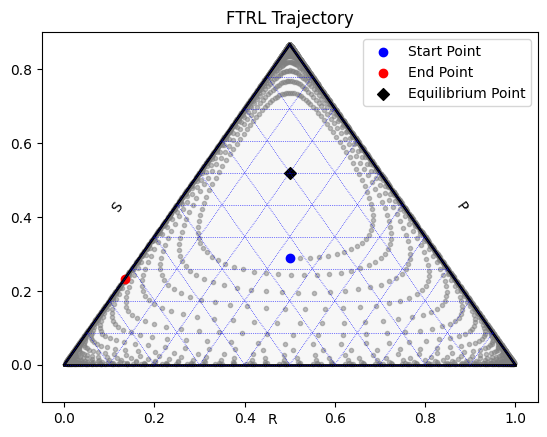

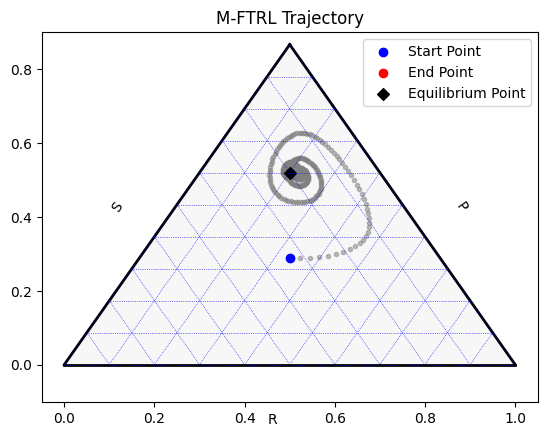

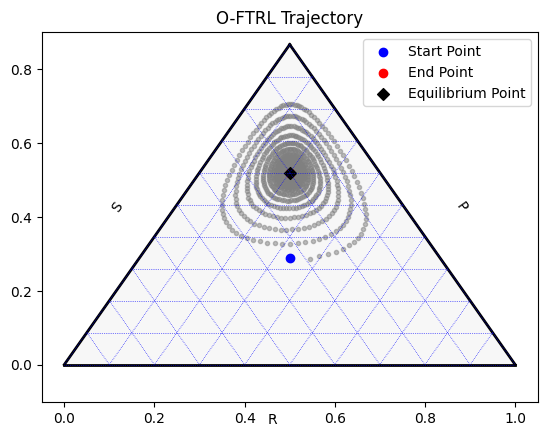

In [ ]:
import numpy as np
import ternary

# Utility matrix for biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def calculate_equilibrium(matrix):
    """Calculate Nash equilibrium for 2x2 zero-sum matrix games"""
    n = matrix.shape[0]
    A = np.vstack([matrix.T, np.ones(n)])
    b = np.append(np.zeros(n), 1)
    res = np.linalg.lstsq(A, b, rcond=None)
    strategy = res[0]
    return strategy

# FTRL function
def ftrl(num_steps, eta):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)

    for _ in range(num_steps):
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)
        strategies.append(strategy)
        utility = np.dot(RPS, strategy)
        scores += utility

    return np.array(strategies)

# M-FTRL function
def m_ftrl(num_steps, eta, mu):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions

    for t in range(num_steps):
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)
        strategies.append(strategy)
        mutation_term = mu * (reference_strategy - strategy) / strategy
        utility = np.dot(RPS, strategy)
        scores += utility + mutation_term

        if (t + 1) % 500 == 0:
            reference_strategy = strategy

    return np.array(strategies)

# O-FTRL function
def o_ftrl(num_steps, eta):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    previous_scores = np.zeros(n_actions)

    for _ in range(num_steps):
        exp_scores = np.exp(eta * (2 * scores - previous_scores))
        strategy = exp_scores / np.sum(exp_scores)
        strategies.append(strategy)
        utility = np.dot(RPS, strategy)
        previous_scores = scores.copy()
        scores += utility

    return np.array(strategies)

# Plot ternary plot
def plot_ternary(strategies, equilibrium, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)
    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)
    tax.set_title(title)
    tax.left_axis_label("S", offset=0.14)
    tax.right_axis_label("P", offset=0.14)
    tax.bottom_axis_label("R", offset=0.14)
    tax.scatter(strategies, marker='.', color="gray", alpha=0.5)
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")
    tax.scatter([equilibrium], marker='D', color="black", label="Equilibrium Point")
    tax.legend()
    tax.show()

# Number of steps
num_steps = 4000

# Calculate the equilibrium point
equilibrium = calculate_equilibrium(RPS)

# Run and plot FTRL
ftrl_strategies = ftrl(num_steps, eta=1)
plot_ternary(ftrl_strategies, equilibrium, "FTRL Trajectory")

# Run and plot M-FTRL
m_ftrl_strategies = m_ftrl(num_steps, eta=1, mu=0.01)
plot_ternary(m_ftrl_strategies, equilibrium, "M-FTRL Trajectory")

# Run and plot O-FTRL
o_ftrl_strategies = o_ftrl(num_steps, eta=1)
plot_ternary(o_ftrl_strategies, equilibrium, "O-FTRL Trajectory")

In [ ]:
import numpy as np

# Utility matrix for the biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def m2wu(num_steps, eta, mu, N):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions

    for t in range(num_steps):
        # Update strategy
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)

        # Mutation term
        mutation_term = mu * (reference_strategy - strategy) / strategy

        # Store current strategy
        strategies.append(strategy.copy())

        # Compute utility and update scores
        utility = RPS @ strategy
        scores += utility + mutation_term

        # Update reference strategy every N steps
        if (t + 1) % N == 0:
            reference_strategy = strategy

    return np.array(strategies)

# Example usage
num_steps = 4000
eta = 0.01
mu = 0.1
N = 100
strategies = m2wu(num_steps, eta, mu, N)

/usr/local/lib/python3.10/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


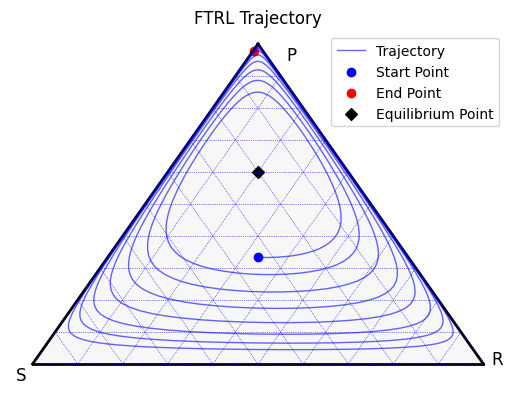

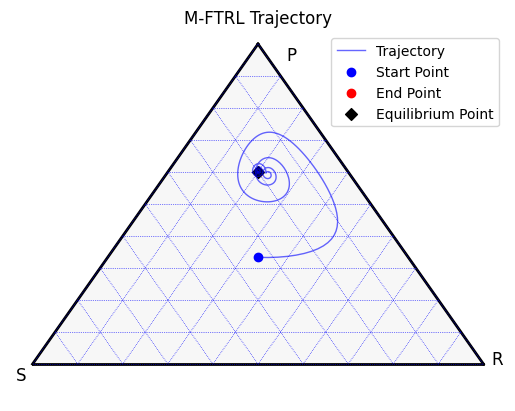

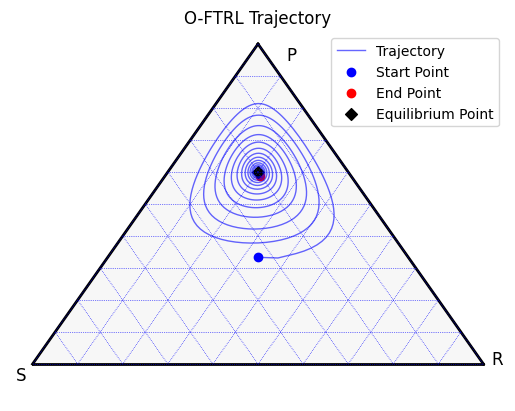

In [ ]:
import numpy as np
import ternary

# Utility matrix for biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def calculate_equilibrium(matrix):
    """Calculate Nash equilibrium for zero-sum matrix games"""
    n = matrix.shape[0]
    A = np.vstack([matrix.T, np.ones(n)])
    b = np.append(np.zeros(n), 1)
    res = np.linalg.lstsq(A, b, rcond=None)
    strategy = res[0]
    return strategy

# FTRL with Averaging
def ftrl(num_steps, eta):
    n_actions = RPS.shape[0]
    strategies = []
    avg_strategies = []
    cumulative_strategy = np.zeros(n_actions)
    scores = np.zeros(n_actions)

    for t in range(1, num_steps + 1):
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)
        strategies.append(strategy.copy())

        # Update cumulative strategy and compute average
        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t
        avg_strategies.append(avg_strategy.copy())

        utility = np.dot(RPS, strategy)
        scores += utility

    return np.array(strategies), np.array(avg_strategies)

# M-FTRL with Averaging
def m_ftrl(num_steps, eta, mu):
    n_actions = RPS.shape[0]
    strategies = []
    avg_strategies = []
    cumulative_strategy = np.zeros(n_actions)
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions

    for t in range(1, num_steps + 1):
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)
        strategies.append(strategy.copy())

        # Update cumulative strategy and compute average
        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t
        avg_strategies.append(avg_strategy.copy())

        mutation_term = mu * (reference_strategy - strategy) / strategy
        utility = np.dot(RPS, strategy)
        scores += utility + mutation_term

        if (t + 1) % 300 == 0:
            reference_strategy = strategy

    return np.array(strategies), np.array(avg_strategies)

# O-FTRL with Averaging
def o_ftrl(num_steps, eta):
    n_actions = RPS.shape[0]
    strategies = []
    avg_strategies = []
    cumulative_strategy = np.zeros(n_actions)
    scores = np.zeros(n_actions)
    previous_scores = np.zeros(n_actions)

    for t in range(1, num_steps + 1):
        exp_scores = np.exp(eta * (2 * scores - previous_scores))
        strategy = exp_scores / np.sum(exp_scores)
        strategies.append(strategy.copy())

        # Update cumulative strategy and compute average
        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t
        avg_strategies.append(avg_strategy.copy())

        utility = np.dot(RPS, strategy)
        previous_scores = scores.copy()
        scores += utility

    return np.array(strategies), np.array(avg_strategies)

def plot_ternary(strategies, equilibrium, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)

    # Draw only the ternary boundary
    tax.boundary(linewidth=2.0)

    # Draw gridlines
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)

    # Set the title
    tax.set_title(title)

    # Hide default axis labels and rectangular bounds
    tax.clear_matplotlib_ticks()
    figure.patch.set_visible(False)
    tax.get_axes().axis('off')

    # Position custom axis labels
    tax.annotate("P", (0.1, 0.95, 0), fontsize=12, horizontalalignment='center')
    tax.annotate("S", (0, -0.05, 1.1), fontsize=12, horizontalalignment='center')
    tax.annotate("R", (1.03, -0, 0), fontsize=12, horizontalalignment='center')

    # Plot the strategies
    tax.plot(strategies, linewidth=1.0, color="blue", alpha=0.6, label="Trajectory")
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")
    tax.scatter([equilibrium], marker='D', color="black", label="Equilibrium Point")

    # Show the legend
    tax.legend()

    # Display the plot
    tax.show()


# Number of steps
num_steps = 1000

# Calculate the equilibrium point
equilibrium = calculate_equilibrium(RPS)

# Run and plot FTRL with averaging
ftrl_strategies, avg_ftrl_strategies = ftrl(num_steps, eta=1)
plot_ternary(ftrl_strategies, equilibrium, "FTRL Trajectory")

# Run and plot M-FTRL with averaging
m_ftrl_strategies, avg_m_ftrl_strategies = m_ftrl(num_steps, eta=1, mu=0.01)
plot_ternary(m_ftrl_strategies, equilibrium, "M-FTRL Trajectory")

# Run and plot O-FTRL with averaging
o_ftrl_strategies, avg_o_ftrl_strategies = o_ftrl(num_steps, eta=1)
plot_ternary(o_ftrl_strategies, equilibrium, "O-FTRL Trajectory")

In [ ]:
import ternary

def plot_ternary(strategies, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)

    # Draw the ternary boundary
    tax.boundary(linewidth=2.0)

    # Remove default matplotlib boundary
    figure.patch.set_visible(False)
    tax.get_axes().axis('off')

    # Draw gridlines
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)

    # Set the title
    tax.set_title(title)

    # Hide default axis labels
    tax.clear_matplotlib_ticks()

    # Set custom tick labels to the corners
    tax.left_axis_label("")
    tax.right_axis_label("")
    tax.bottom_axis_label("")

    tax.annotate("P", (0, 1, 0), fontsize=12, horizontalalignment='left')
    tax.annotate("S", (0, 0, 1), fontsize=12, horizontalalignment='right')
    tax.annotate("R", (1, 0, 0), fontsize=12, verticalalignment='bottom')

    # Plot the strategies
    tax.scatter(strategies, marker='.', color="gray", alpha=0.5)

    # Highlight the start, end, and equilibrium points
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")
    tax.scatter([[1/3, 1/3, 1/3]], marker='D', color="black", label="Equilibrium Point")

    # Show the legend
    tax.legend()

    # Display the plot
    tax.show()

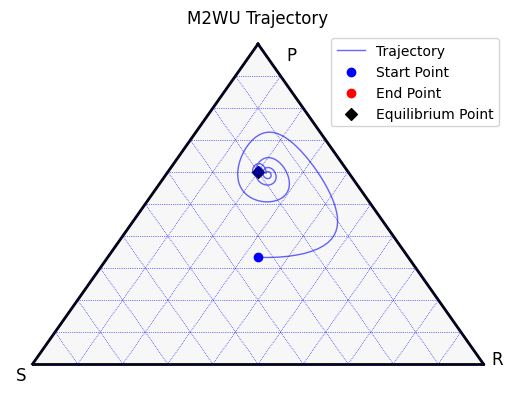

In [ ]:
import numpy as np

# Utility matrix for the biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def m2wu(num_steps, eta, mu, N):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions

    for t in range(num_steps):
        # Update strategy
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)

        # Mutation term
        mutation_term = mu * (reference_strategy - strategy) / strategy

        # Store current strategy
        strategies.append(strategy.copy())

        # Compute utility and update scores
        utility = RPS @ strategy
        scores += utility + mutation_term

        # Update reference strategy every N steps
        if (t + 1) % N == 0:
            reference_strategy = strategy

    return np.array(strategies)

# Example usage
num_steps = 1000
eta = 1
mu = 0.01
N = 300
m2wu_strategies = m2wu(num_steps, eta, mu, N)
plot_ternary(m2wu_strategies, equilibrium, "M2WU Trajectory")
#plot_ternary(m2wu_strategies, "M2WU Trajectory")

/usr/local/lib/python3.10/dist-packages/ternary/plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


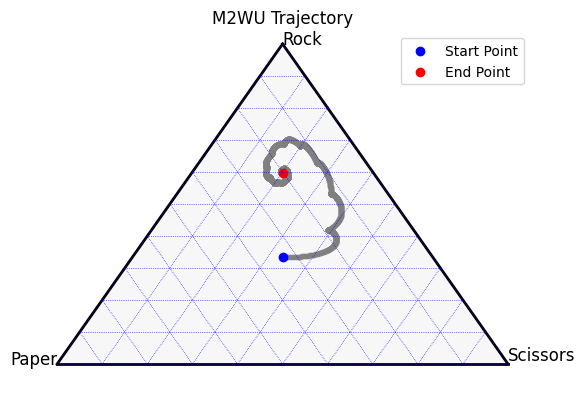

In [ ]:
import numpy as np
import ternary

# Utility matrix for the biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def m2wu(num_steps, eta, mu, N):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions

    for t in range(num_steps):
        # Update strategy
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)

        # Mutation term
        mutation_term = mu * (reference_strategy - strategy) / strategy

        # Store current strategy
        strategies.append(strategy.copy())

        # Compute utility and update scores
        utility = RPS @ strategy
        scores += utility + mutation_term

        # Update reference strategy every N steps
        if (t + 1) % N == 0:
            reference_strategy = strategy

    return np.array(strategies)

def plot_ternary(strategies, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)

    # Draw the ternary boundary
    tax.boundary(linewidth=2.0)

    # Remove default matplotlib boundary
    figure.patch.set_visible(False)
    tax.get_axes().axis('off')

    # Draw gridlines
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)

    # Set the title
    tax.set_title(title)

    # Hide default axis labels
    tax.clear_matplotlib_ticks()

    # Set custom tick labels to the corners
    tax.left_axis_label("")
    tax.right_axis_label("")
    tax.bottom_axis_label("")

    tax.annotate("Rock", (0, 1, 0), fontsize=12, horizontalalignment='left')
    tax.annotate("Paper", (0, 0, 1), fontsize=12, horizontalalignment='right')
    tax.annotate("Scissors", (1, 0, 0), fontsize=12, verticalalignment='bottom')

    # Plot the strategies
    tax.scatter(strategies, marker='.', color="gray", alpha=0.5)

    # Highlight the start, end, and equilibrium points
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")

    # Show the legend
    tax.legend()

    # Display the plot
    tax.show()

# Example usage
num_steps = 10000
eta = 0.1
mu = 0.1
N = 500
m2wu_strategies = m2wu(num_steps, eta, mu, N)
plot_ternary(m2wu_strategies, "M2WU Trajectory")


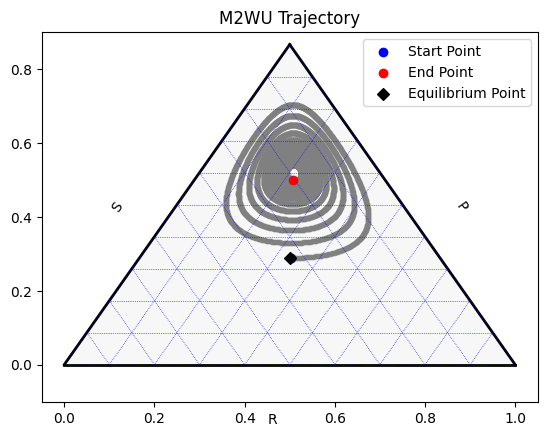

In [ ]:
import numpy as np
import ternary

# Utility matrix for biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def m2wu(num_steps, eta, mu):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    pi = np.ones(n_actions) / n_actions  # Initial strategy

    for _ in range(num_steps):
        # Compute utility vector
        utility = np.dot(RPS, pi)

        # Mutation term
        mutation = mu * (np.ones(n_actions) - pi)

        # Update scores with mutation
        scores += utility + mutation

        # Compute updated strategy using M2WU update rule
        exp_scores = np.exp(eta * scores)
        pi = exp_scores / np.sum(exp_scores)

        # Store the strategy
        strategies.append(pi.copy())

    return np.array(strategies)

# Plot ternary plot
def plot_ternary(strategies, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)
    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)
    tax.set_title(title)
    tax.left_axis_label("S", offset=0.14)
    tax.right_axis_label("P", offset=0.14)
    tax.bottom_axis_label("R", offset=0.14)
    tax.scatter(strategies, marker='.', color="gray", alpha=0.5)
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")
    tax.scatter([[1/3, 1/3, 1/3]], marker='D', color="black", label="Equilibrium Point")
    tax.legend()
    tax.show()

# Number of steps
num_steps = 10000

# Run and plot M2WU
m2wu_strategies = m2wu(num_steps, eta=0.1, mu=0.01)
plot_ternary(m2wu_strategies, "M2WU Trajectory")

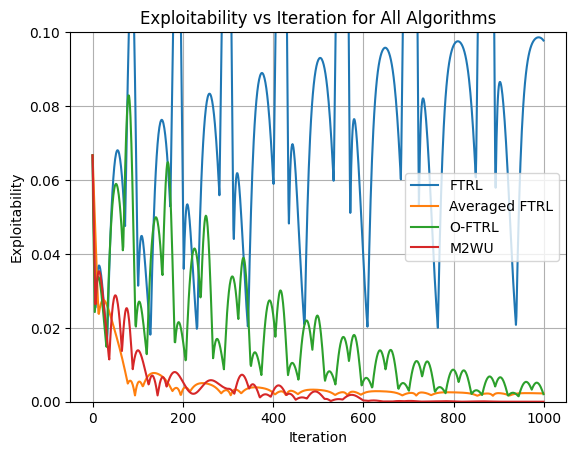

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Utility matrix for biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def calculate_exploitability(matrix, strategy):
    best_response = np.max(matrix @ strategy)
    exploitability = best_response - (matrix @ strategy).dot(strategy)
    return exploitability

def ftrl_exploitability(num_steps, eta):
    n_actions = RPS.shape[0]
    scores = np.zeros(n_actions)
    cumulative_strategy = np.zeros(n_actions)
    ftrl_exploitability = []
    avg_exploitability = []

    for t in range(1, num_steps + 1):
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)

        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t

        ftrl_exploitability.append(calculate_exploitability(RPS, strategy))
        avg_exploitability.append(calculate_exploitability(RPS, avg_strategy))

        utility = np.dot(RPS, strategy)
        scores += utility

    return ftrl_exploitability, avg_exploitability

def m_ftrl_exploitability(num_steps, eta, mu):
    n_actions = RPS.shape[0]
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions
    cumulative_strategy = np.zeros(n_actions)
    m_ftrl_exploitability = []
    avg_exploitability = []

    for t in range(1, num_steps + 1):
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)

        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t

        m_ftrl_exploitability.append(calculate_exploitability(RPS, strategy))
        avg_exploitability.append(calculate_exploitability(RPS, avg_strategy))

        mutation_term = mu * (reference_strategy - strategy) / strategy
        utility = np.dot(RPS, strategy)
        scores += utility + mutation_term

        if (t + 1) % 300 == 0:
            reference_strategy = strategy

    return m_ftrl_exploitability, avg_exploitability

def o_ftrl_exploitability(num_steps, eta):
    n_actions = RPS.shape[0]
    scores = np.zeros(n_actions)
    previous_scores = np.zeros(n_actions)
    cumulative_strategy = np.zeros(n_actions)
    o_ftrl_exploitability = []
    avg_exploitability = []

    for t in range(1, num_steps + 1):
        exp_scores = np.exp(eta * (2 * scores - previous_scores))
        strategy = exp_scores / np.sum(exp_scores)

        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t

        o_ftrl_exploitability.append(calculate_exploitability(RPS, strategy))
        avg_exploitability.append(calculate_exploitability(RPS, avg_strategy))

        utility = np.dot(RPS, strategy)
        previous_scores = scores.copy()
        scores += utility

    return o_ftrl_exploitability, avg_exploitability

# RMD function for exploitability
def rmd_exploitability(num_steps, eta, mutation_matrix):
    n_actions = RPS.shape[0]
    cumulative_strategy = np.zeros(n_actions)
    scores = np.zeros(n_actions)
    rmd_exploitability = []
    avg_exploitability = []

    for t in range(1, num_steps + 1):
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)

        if mutation_matrix is not None:
            strategy = mutation_matrix @ strategy

        cumulative_strategy += strategy
        avg_strategy = cumulative_strategy / t

        rmd_exploitability.append(calculate_exploitability(RPS, strategy))
        avg_exploitability.append(calculate_exploitability(RPS, avg_strategy))

        utility = RPS @ strategy
        scores += utility

    return rmd_exploitability, avg_exploitability

def m2wu(num_steps, eta, mu, N):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions
    m2wu_exploitability = []  # List to store exploitability for each iteration

    for t in range(num_steps):
        # Update strategy
        exp_scores = np.exp(eta * scores)
        strategy = exp_scores / np.sum(exp_scores)
        strategies.append(strategy.copy())

        # Compute and store exploitability
        current_exploitability = calculate_exploitability(RPS, strategy)
        m2wu_exploitability.append(current_exploitability)

        # Mutation term
        mutation_term = mu * (reference_strategy - strategy) / strategy

        # Compute utility and update scores
        utility = np.dot(RPS, strategy)
        scores += utility + mutation_term

        # Update reference strategy every N steps
        if (t + 1) % N == 0:
            reference_strategy = strategy

    return strategies, m2wu_exploitability

# Example function to plot exploitability curves for all algorithms
def plot_all_exploitability_curves(ftrl_expl, ftrl_expl_avg, m_ftrl_expl, o_ftrl_expl, m2wu_expl):
    plt.plot(ftrl_expl, label="FTRL")
    plt.plot(ftrl_expl_avg, label="Averaged FTRL")
    #plt.plot(m_ftrl_expl, label="M-FTRL")
    plt.plot(o_ftrl_expl, label="O-FTRL")
    plt.plot(m2wu_expl, label="M2WU")
    plt.xlabel("Iteration")
    plt.ylabel("Exploitability")
    plt.ylim(0, 0.1)
    plt.legend()
    plt.grid(True)
    plt.title("Exploitability vs Iteration for All Algorithms")
    plt.show()

# Number of steps
num_steps = 1000
eta = 1
mu = 0.01
N = 300

# Running the M2WU algorithm

# Run and get exploitability curves
ftrl_expl, ftrl_avg = ftrl_exploitability(num_steps, eta=1)
m_ftrl_expl, m_ftrl_avg = m_ftrl_exploitability(num_steps, eta=1, mu=0.01)
o_ftrl_expl, o_ftrl_avg = o_ftrl_exploitability(num_steps, eta=1)
m2wu_expl, m2wu_avg = m2wu(num_steps, eta, mu, N)

# Plot the results
plot_all_exploitability_curves(ftrl_expl, ftrl_avg, m_ftrl_expl, o_ftrl_expl, m2wu_avg)

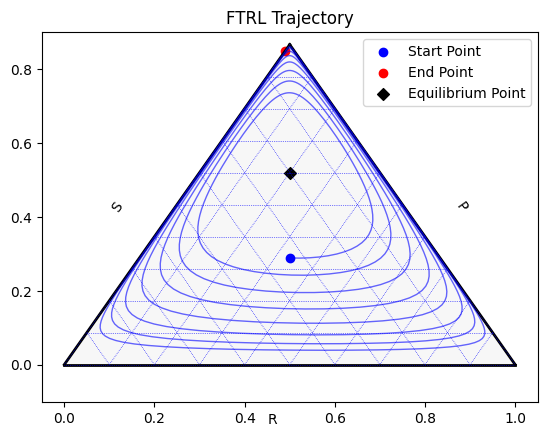

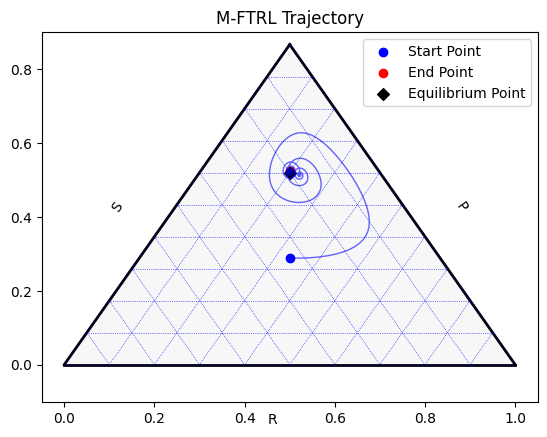

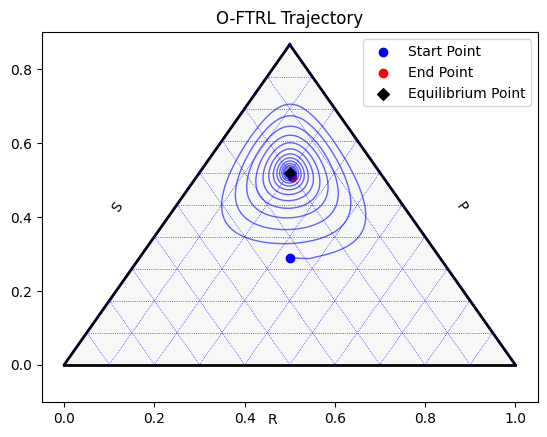

In [ ]:
import numpy as np
import ternary

# Utility matrix for biased RPS
RPS = np.array([
    [0, -0.1, 0.3],
    [0.1, 0, -0.1],
    [-0.3, 0.1, 0]
])

def calculate_equilibrium(matrix):
    """Calculate Nash equilibrium for zero-sum matrix games"""
    n = matrix.shape[0]
    A = np.vstack([matrix.T, np.ones(n)])
    b = np.append(np.zeros(n), 1)
    res = np.linalg.lstsq(A, b, rcond=None)
    strategy = res[0]
    return strategy

def entropy_regularizer(scores, eta):
    """Calculate the probability distribution with entropy regularization"""
    log_probs = eta * scores - np.log(np.exp(eta * scores).sum())
    return np.exp(log_probs)

# FTRL with Entropy Regularizer
def ftrl(num_steps, eta):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)

    for _ in range(num_steps):
        strategy = entropy_regularizer(scores, eta)
        strategies.append(strategy)
        utility = np.dot(RPS, strategy)
        scores += utility

    return np.array(strategies)

# M-FTRL with Entropy Regularizer
def m_ftrl(num_steps, eta, mu):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    reference_strategy = np.ones(n_actions) / n_actions

    for t in range(num_steps):
        strategy = entropy_regularizer(scores, eta)
        strategies.append(strategy)
        mutation_term = mu * (reference_strategy - strategy) / strategy
        utility = np.dot(RPS, strategy)
        scores += utility + mutation_term

        if (t + 1) % 500 == 0:
            reference_strategy = strategy

    return np.array(strategies)

# O-FTRL with Entropy Regularizer
def o_ftrl(num_steps, eta):
    n_actions = RPS.shape[0]
    strategies = []
    scores = np.zeros(n_actions)
    previous_scores = np.zeros(n_actions)

    for _ in range(num_steps):
        strategy = entropy_regularizer(2 * scores - previous_scores, eta)
        strategies.append(strategy)
        utility = np.dot(RPS, strategy)
        previous_scores = scores.copy()
        scores += utility

    return np.array(strategies)

# Plot ternary plot
def plot_ternary(strategies, equilibrium, title):
    scale = 1.0
    figure, tax = ternary.figure(scale=scale)
    tax.boundary(linewidth=2.0)
    tax.gridlines(multiple=0.1, color="blue", linewidth=0.5)
    tax.set_title(title)
    tax.left_axis_label("S", offset=0.14)
    tax.right_axis_label("P", offset=0.14)
    tax.bottom_axis_label("R", offset=0.14)
    tax.plot(strategies, linewidth=1.0, color="blue", alpha=0.6)
    tax.scatter([strategies[0]], marker='o', color="blue", label="Start Point")
    tax.scatter([strategies[-1]], marker='o', color="red", label="End Point")
    tax.scatter([equilibrium], marker='D', color="black", label="Equilibrium Point")
    tax.legend()
    tax.show()

# Number of steps
num_steps = 1000

# Calculate the equilibrium point
equilibrium = calculate_equilibrium(RPS)

# Run and plot FTRL with entropy regularizer
ftrl_strategies = ftrl(num_steps, eta=1)
plot_ternary(ftrl_strategies, equilibrium, "FTRL Trajectory")

# Run and plot M-FTRL with entropy regularizer
m_ftrl_strategies = m_ftrl(num_steps, eta=1, mu=0.01)
plot_ternary(m_ftrl_strategies, equilibrium, "M-FTRL Trajectory")

# Run and plot O-FTRL with entropy regularizer
o_ftrl_strategies = o_ftrl(num_steps, eta=1)
plot_ternary(o_ftrl_strategies, equilibrium, "O-FTRL Trajectory")
